<a href="https://colab.research.google.com/github/hila-chefer/Transformer-MM-Explainability/blob/main/CLIP_explainability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLIP Explainability**

In [1]:
import os

os.chdir(f'./Transformer-MM-Explainability')
# !pip install einops
# !pip install ftfy
# !pip install captum

# **CLIP**

In [2]:
import torch
import CLIP.clip as clip
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from captum.attr import visualization
import warnings

warnings.filterwarnings('ignore')

In [3]:
from utils import interpret, show_img_heatmap, show_txt_heatmap

In [4]:
clip.clip._MODELS = {
    "ViT-B/32": "https://openaipublic.azureedge.net/clip/models/40d365715913c9da98579312b702a82c18be219cc2a73407c4526f58eba950af/ViT-B-32.pt",
    "ViT-B/16": "https://openaipublic.azureedge.net/clip/models/5806e77cd80f8b59890b7e101eabd078d9fb84e6937f9e85e4ecb61988df416f/ViT-B-16.pt",
}

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device, jit=False)

In [6]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

tensor([0.0276, 0.0648, 0.0048, 0.1705, 0.7324], device='cuda:0',
       dtype=torch.float16)


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
0,0 (0.00),0,0.00,a man with eye glasses


tensor([0.0276, 0.0648, 0.0048, 0.1705, 0.7324], device='cuda:0',
       dtype=torch.float16)


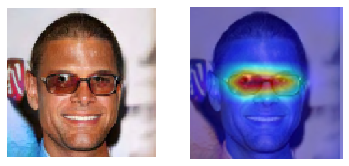

tensor([0.0355, 0.0699, 0.0015, 0.0647, 0.8286], device='cuda:0',
       dtype=torch.float16)


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
0,0 (0.00),0,0.00,a man with white teeth


tensor([0.0355, 0.0699, 0.0015, 0.0647, 0.8286], device='cuda:0',
       dtype=torch.float16)


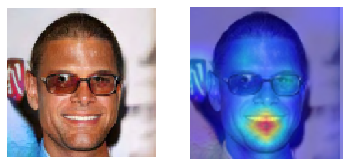

tensor([0.4397, 0.4900, 0.0297, 0.0406, 0.0000], device='cuda:0',
       dtype=torch.float16)


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
0,0 (0.00),0,0.00,a man with a nose


tensor([0.4397, 0.4900, 0.0297, 0.0406, 0.0000], device='cuda:0',
       dtype=torch.float16)


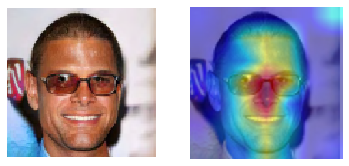

In [9]:
def show_cam(mask):
    heatmap = cv2.applyColorMap(np.uint8(255 * mask), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    cam = heatmap
    cam = cam / np.max(cam)
    return cam


def interpret_and_generate(model, img, texts):
    text = clip.tokenize(texts).to(device)
    R_text, R_image = interpret(model=model, image=img, texts=text, device=device)
    batch_size = text.shape[0]

    for i in range(batch_size):
        text_scores = show_txt_heatmap(texts[i], text[i], R_text[i])
        image_relevance = show_img_heatmap(R_image[i], img, orig_image=Image.open(img_path))
#         image_relevance = show_cam(image_relevance)
#         plt.imshow(image_relevance)
#         print(text_scores)
        plt.show()


texts = ["a man with eyeglasses", "a man with white teeth", "a man with a nose"]
img_path = "CLIP/glasses.png"
img = preprocess(Image.open(img_path)).unsqueeze(0).to(device)
interpret_and_generate(model, img, texts)